# WEAPONS DETECTION PROJECT 
### Using Keras, Tensorflow, OpenCV and Python
###### Guns and Knives Image Detection : 2Weapons Dataset Folder
CONSIDERING WHOLE DATA OF GUNS AND KNIVES

Aim : To detect the two different weapons - Guns and Knives, build and evaluate the model using deep learning, tensorflow and python.

DATASETS :
    1. https://www.dasci.ess/transfercia/open-data/24705/
    2. https://www.sci2s.ugr.es/weapons-detection#SW

###### SOURCING DATA FOLDERS

In [27]:
#import libraries

#warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import pickle as pk

#building model libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard

import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, SGD, Adamax, Nadam
import keras

In [8]:
#weapon image directory
DATA_DIR = r".\data"

#category list
CATEGORIES = ["Guns", "Knives"]

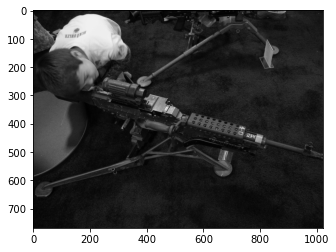

In [9]:
#read images from Train dataset
for cate in CATEGORIES:
    #path to each category
    path = os.path.join(DATA_DIR, cate)
    for img in os.listdir(path):
        #read train images from all categories
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_arr, cmap='gray')
        plt.show()
        break
    break

In [10]:
print(img_arr)

[[10 10  9 ... 12 12 15]
 [ 9  9  8 ... 14 13 16]
 [10 10  9 ... 14 13 14]
 ...
 [12 11 10 ...  9 10 13]
 [ 8  9  9 ...  8  8 11]
 [ 5  6  8 ...  9  9 12]]


In [11]:
print(img_arr.shape)
#print(test_img_arr.shape)

(768, 1024)


###### PRE-PROCESSING STEP

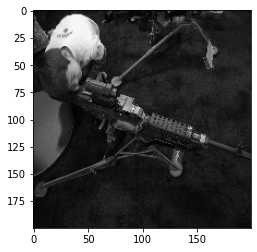

In [12]:
#working on normalisation at Training data
IMG_SIZE = 200 #optimal image size number

new_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_arr, cmap='gray')
plt.show()

In [13]:
training_data = []

def create_train_data():
    #read images from Train dataset
    for cate in CATEGORIES:
        #path to each category
        path = os.path.join(DATA_DIR, cate)
        class_num = CATEGORIES.index(cate)
        for img in os.listdir(path):
            try:
                #read train images from all categories
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_arr, class_num])
            except Exception as e :
                pass
            
create_train_data()

In [14]:
print(len(training_data))

40


In [15]:
#shuffle the training data
import random
random.shuffle(training_data)

In [16]:
#sample checking
for ex in training_data[:10]:
    print(ex[1])

0
0
1
0
0
0
0
1
0
0


###### TRAIN-TEST SPLIT PROCESSING

In [17]:
X = [] #feature set
y = [] #label list

In [18]:
#STORE features and labels
for features, labels in training_data:
    X.append(features)
    y.append(labels)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #1=GRAYSCALE, IMG_SIZE=55

In [19]:
#saving the data
#for X
pkl_out = open("X.pickle", "wb")
pickle.dump(X, pkl_out)
pkl_out.close()

#for y
pkl_out = open("y.pickle", "wb")
pickle.dump(y, pkl_out)
pkl_out.close()

In [20]:
#read pickle file for X
X_pkl_in = open("X.pickle", "rb")
X = pickle.load(X_pkl_in)

In [21]:
#checking X
X[1]

array([[[ 73],
        [ 79],
        [ 87],
        ...,
        [104],
        [106],
        [104]],

       [[ 59],
        [ 75],
        [ 88],
        ...,
        [108],
        [106],
        [103]],

       [[ 62],
        [ 72],
        [ 89],
        ...,
        [104],
        [ 98],
        [101]],

       ...,

       [[ 85],
        [119],
        [ 59],
        ...,
        [ 50],
        [ 44],
        [ 42]],

       [[ 89],
        [ 62],
        [ 49],
        ...,
        [ 42],
        [ 48],
        [ 43]],

       [[ 81],
        [ 45],
        [ 46],
        ...,
        [ 43],
        [ 46],
        [ 48]]], dtype=uint8)

In [22]:
#read pickle file for X
y_pkl_in = open("y.pickle", "rb")
y = pickle.load(y_pkl_in)

In [23]:
y[1]

0

In [24]:
X.shape

(40, 200, 200, 1)

In [28]:
#read pickle file for X and y
X = pk.load(open("X.pickle","rb"))
y = pk.load(open("y.pickle","rb"))

#normalization
X = X/255.0
y = np.array(y)

In [29]:
print(X.shape)
print(y.shape)

(40, 200, 200, 1)
(40,)


In [30]:
#train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=2)

In [31]:
X_train

array([[[[0.11372549],
         [0.10588235],
         [0.09411765],
         ...,
         [0.2       ],
         [0.35686275],
         [0.74509804]],

        [[0.12941176],
         [0.1254902 ],
         [0.12156863],
         ...,
         [0.28627451],
         [0.61960784],
         [0.85490196]],

        [[0.14901961],
         [0.14509804],
         [0.14117647],
         ...,
         [0.61568627],
         [0.80784314],
         [0.90196078]],

        ...,

        [[0.25882353],
         [0.23529412],
         [0.18431373],
         ...,
         [0.02352941],
         [0.02352941],
         [0.03137255]],

        [[0.29019608],
         [0.2627451 ],
         [0.19607843],
         ...,
         [0.02352941],
         [0.04705882],
         [0.05490196]],

        [[0.21960784],
         [0.22745098],
         [0.18039216],
         ...,
         [0.05882353],
         [0.06666667],
         [0.07843137]]],


       [[[0.30588235],
         [0.3372549 ],
         [0.32

In [32]:
X_test

array([[[[0.65882353],
         [0.67058824],
         [0.67058824],
         ...,
         [0.71372549],
         [0.7254902 ],
         [0.72941176]],

        [[0.6745098 ],
         [0.69019608],
         [0.68235294],
         ...,
         [0.7254902 ],
         [0.7372549 ],
         [0.7254902 ]],

        [[0.68627451],
         [0.69019608],
         [0.64313725],
         ...,
         [0.70196078],
         [0.73333333],
         [0.72156863]],

        ...,

        [[0.7254902 ],
         [0.70196078],
         [0.69803922],
         ...,
         [0.7254902 ],
         [0.74117647],
         [0.74117647]],

        [[0.71372549],
         [0.68235294],
         [0.71372549],
         ...,
         [0.74901961],
         [0.76078431],
         [0.71764706]],

        [[0.69411765],
         [0.71764706],
         [0.71372549],
         ...,
         [0.74901961],
         [0.73333333],
         [0.72941176]]],


       [[[0.41568627],
         [0.4       ],
         [0.40

In [33]:
y_train

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1])

In [34]:
y_test

array([1, 0, 0, 0])

In [35]:
#shape of Xs
print(X_train.shape)
print(X_test.shape)

(36, 200, 200, 1)
(4, 200, 200, 1)


In [36]:
#shape of Ys
print(y_train.shape)
print(y_test.shape)

(36,)
(4,)


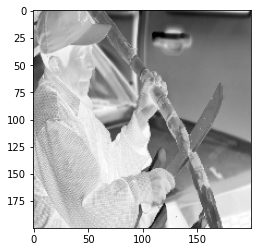

In [37]:
# sample image check
plt.imshow(X_train[0][:,:,0], cmap = plt.cm.binary) # cmap is used to bring the image in the grayscale/BnW format
plt.show()

In [38]:
print(X_train[0][:,:,0])

[[0.11372549 0.10588235 0.09411765 ... 0.2        0.35686275 0.74509804]
 [0.12941176 0.1254902  0.12156863 ... 0.28627451 0.61960784 0.85490196]
 [0.14901961 0.14509804 0.14117647 ... 0.61568627 0.80784314 0.90196078]
 ...
 [0.25882353 0.23529412 0.18431373 ... 0.02352941 0.02352941 0.03137255]
 [0.29019608 0.2627451  0.19607843 ... 0.02352941 0.04705882 0.05490196]
 [0.21960784 0.22745098 0.18039216 ... 0.05882353 0.06666667 0.07843137]]


In [39]:
# using keras under tensorflow to represent the X data
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [40]:
print(X_train[0][:,:,0])

[[0.01918319 0.01756082 0.0156756  ... 0.03030851 0.05382071 0.11167492]
 [0.02182915 0.02081283 0.02024766 ... 0.04338277 0.09344695 0.12813228]
 [0.0251366  0.02406483 0.02351341 ... 0.09330267 0.12183589 0.13518543]
 ...
 [0.0436583  0.03902405 0.03069806 ... 0.00356571 0.00354862 0.0047021 ]
 [0.04895021 0.04357686 0.03265751 ... 0.00356571 0.00709724 0.00822868]
 [0.03704341 0.03772325 0.03004491 ... 0.00891427 0.01005442 0.01175525]]


###### BUILDING MODEL

In [41]:
#batch size
BATCH_SIZE = 35

#learning rate
LR = 0.01

#decay rate
DEC = 0.01

#epochs number
NUM_EPOCHS = 10

In [42]:
#name format
NAME = "Guns-vs-Knives-64x2-CNN"

In [43]:
#Sequential Model building
model = Sequential()

In [44]:
#LAYERS OF MODEL

model.add(Conv2D(32, (3,3), padding='same', input_shape = X.shape[1:], activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding='same', activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.75))

model.add(Conv2D(64, (3,3), padding='same', activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.75))

model.add(Conv2D(128, (3,3), padding='same', activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.75))

model.add(Conv2D(128, (3,3), padding='same', activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.75))

model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.75))

model.add(Dense(1, activation = "sigmoid"))

In [45]:
#callback
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

#checking one by one optimizers and analysing the model
opt = Adam(lr=LR, decay=DEC)

#compile
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

#summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        3

In [46]:
#fitting the model
model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs= NUM_EPOCHS, callbacks=[tensorboard]) 

Epoch 1/10
2/2 [==============================] - 15s 7s/step - loss: 8.0674 - accuracy: 0.4767
Epoch 2/10
2/2 [==============================] - 3s 150ms/step - loss: 111.0886 - accuracy: 0.5328
Epoch 3/10
2/2 [==============================] - 3s 143ms/step - loss: 20.4678 - accuracy: 0.5794
Epoch 4/10
2/2 [==============================] - 3s 156ms/step - loss: 53.8200 - accuracy: 0.4767
Epoch 5/10
2/2 [==============================] - 3s 144ms/step - loss: 14.8297 - accuracy: 0.7291
Epoch 6/10
2/2 [==============================] - 3s 134ms/step - loss: 31.3328 - accuracy: 0.6635
Epoch 7/10
2/2 [==============================] - 3s 149ms/step - loss: 23.1139 - accuracy: 0.6169
Epoch 8/10
2/2 [==============================] - 3s 160ms/step - loss: 31.9219 - accuracy: 0.5889
Epoch 9/10
2/2 [==============================] - 3s 146ms/step - loss: 14.5053 - accuracy: 0.6635
Epoch 10/10
2/2 [==============================] - 3s 136ms/step - loss: 14.7445 - accuracy: 0.8132


###### PREDICTION

In [47]:
# evaluate the validation data
val_loss, val_acc = model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 843ms/step - loss: 9.9536 - accuracy: 0.7500


In [48]:
# printing validation loss
#print(val_loss)

# printing validation accuracy
#print(val_acc)

In [49]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1)

In [50]:
# Convert validation observations to one hot vectors
#Y_true = np.argmax(y_test, axis = 1)
# checking sample y true value for the predicted value
#print(Y_true)

### Save the model

In [57]:
from keras.models import load_model
import joblib

# saving model in HDF5 file
#joblib.dump(model, "./models/saved_model.joblib")
model.save("./models/model.h5")

### Load the model

In [58]:
# Load the model from the file 
loaded_model = load_model("./models/model.h5")

# make predictions from the loaded file
loss, accuracy = loaded_model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 1s/step - loss: 9.9536 - accuracy: 0.7500


### Download the model

In [55]:
#from google.colab import files

#files.download("./models/saved_model.joblib")
#files.download("./models/model.h5")